In [2]:
!pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/299.9 kB 656.4 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/299.9 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 194.6/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [4]:
# Only run these once
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
# Load raw datasets
df_fake = pd.read_csv("../data/raw/Fake.csv")
df_true = pd.read_csv("../data/raw/True.csv")


# Add labels
df_fake['label'] = 0
df_true['label'] = 1

# Combine
df = pd.concat([df_fake, df_true], ignore_index=True)

# Pick a column to analyze
col = 'text' if 'text' in df.columns else 'content'
text_data = df[col].dropna().astype(str).str.lower()

In [10]:
# Tokenize and remove stopwords
stop_words = set(stopwords.words("english"))
tokens = [word for line in text_data for word in word_tokenize(line) if word.isalpha() and word not in stop_words]

# Frequency distribution
freq_dist = Counter(tokens)
most_common = freq_dist.most_common(30)

In [11]:
# Show top tokens
pd.DataFrame(most_common, columns=["Token", "Frequency"])

,Token,Frequency
0,said,130186
1,trump,128490
2,would,54987
3,president,52169
4,people,41153
5,one,35671
6,state,32271
7,also,31189
8,new,30982
9,reuters,28799


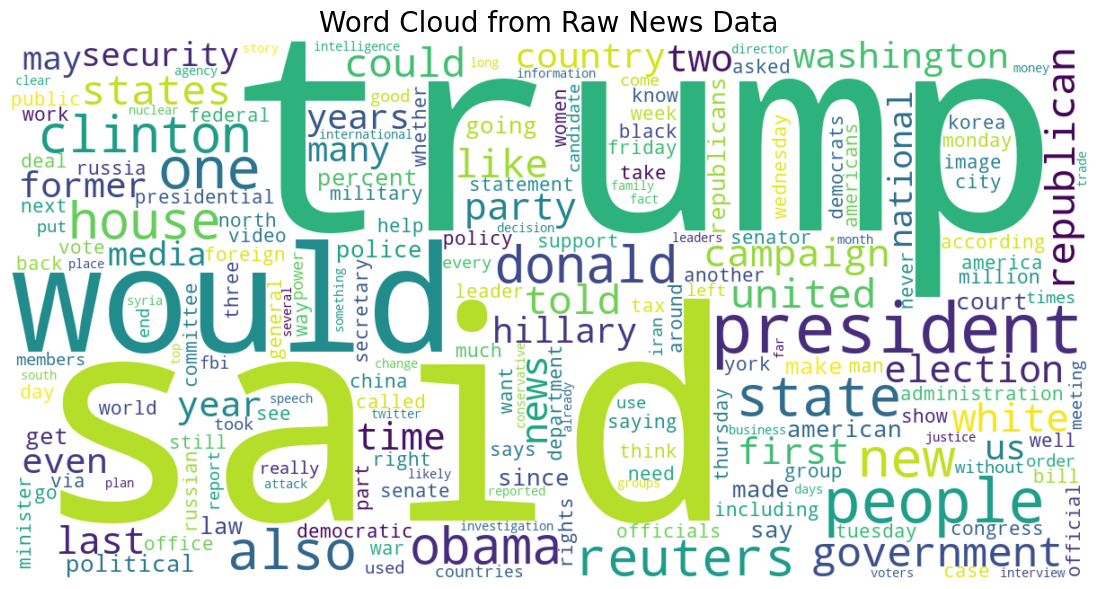

In [12]:
# Plot word cloud
wc = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Raw News Data", fontsize=20)
plt.show()

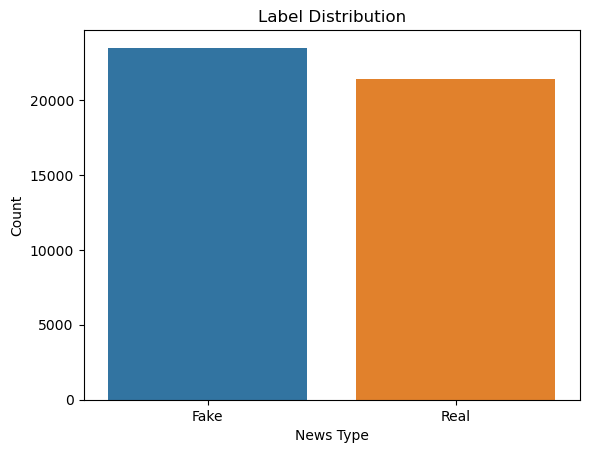

In [13]:
# Label distribution
sns.countplot(data=df, x='label')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title("Label Distribution")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()